# Do my prescribed GDDs match what I see in the climate inputs?

In [105]:
vegtype_int = 19 # rainfed spring wheat
vegtype_str_ggcmi = 'swh_rf'

In [106]:
# Setup
import numpy as np
import xarray as xr

# Input directory
import socket
hostname = socket.gethostname()
if hostname == "Sams-2021-MacBook-Pro.local":
    crop_dates_dir = "/Users/Shared/CESM_work/crop_dates/"
else:
    crop_dates_dir = "/glade/u/home/samrabin/crop_dates/"

## My runs' resolution (f19_g17)

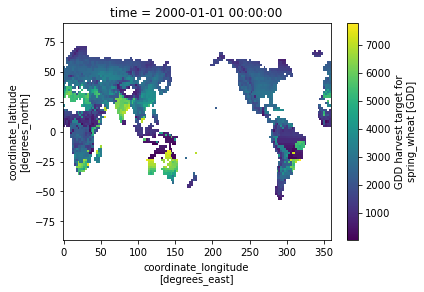

In [107]:
# Find inputs
rx_gdd_file = crop_dates_dir + "cropcals.f19-g17.rx_crop_calendars2.IHistClm50BgcCrop.ggcmi.1977-2014.gddgen2/gdds_20220902_114645.nc"
rx_gdds = xr.open_dataset(rx_gdd_file)[f'gdd1_{vegtype_int}']
rx_gdds = rx_gdds.where(rx_gdds > 0)

# Make global map
rx_gdds.plot();

The problem is quite evident in central India, so pick a gridcell there to do the testing.

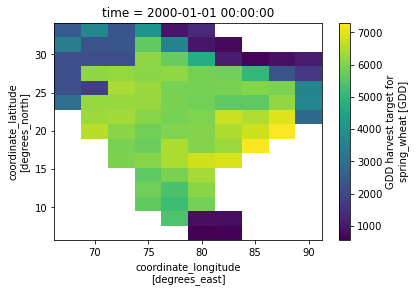

In [108]:
# Zoom in on India
india_gdds = rx_gdds.sel(lon=slice(67,90), lat=slice(6,35))
india_gdds.plot();

In [109]:
# Pick a gridcell
# print(f'lon: {india_gdds.lon.values}')
# print(f'lat: {india_gdds.lat.values}')
thisLon_india = 77.5
thisLat_india = 19.894737
print(f'Bad (?) GDD value for lon {thisLon_india} lat {thisLat_india}: {india_gdds.sel(lon=thisLon_india, lat=thisLat_india).values[0]}')

Bad (?) GDD value for lon 77.5 lat 19.894737: 5985.84619140625


What is the growing season there?

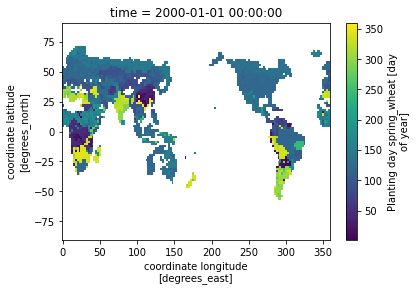

In [110]:
rx_sdates_file = crop_dates_dir + "sdates_ggcmi_crop_calendar_phase3_v1.01_nninterp-f19_g17.2000-2000.20220727_164727.nc"
rx_sdates = xr.open_dataset(rx_sdates_file)[f'sdate1_{vegtype_int}']
rx_hdates_file = crop_dates_dir + "hdates_ggcmi_crop_calendar_phase3_v1.01_nninterp-f19_g17.2000-2000.20220727_164727.nc"
rx_hdates = xr.open_dataset(rx_hdates_file)[f'hdate1_{vegtype_int}']

rx_sdates = rx_sdates.where(rx_gdds>0)
rx_hdates = rx_hdates.where(rx_gdds>0)

rx_sdates.plot() ;

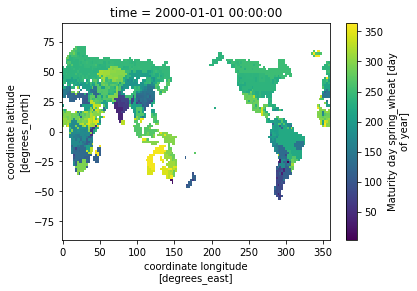

In [57]:
rx_hdates.plot() ;

In [111]:
print(f'Sowing date for lon {thisLon_india} lat {thisLat_india}: {rx_sdates.sel(lon=thisLon_india, lat=thisLat_india).values[0]}')
print(f'Harvest date for lon {thisLon_india} lat {thisLat_india}: {rx_hdates.sel(lon=thisLon_india, lat=thisLat_india).values[0]}')

Sowing date for lon 77.5 lat 19.894737: 330.0
Harvest date for lon 77.5 lat 19.894737: 42.0


I wonder... Does this problem happen only/mainly in places where the growing season crosses the new year?

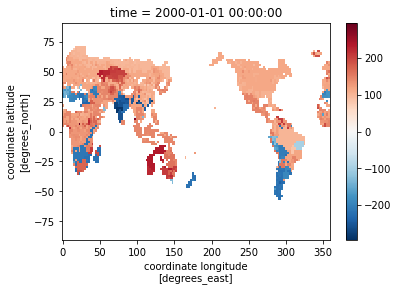

In [112]:
rx_datediff = (rx_hdates - rx_sdates)
rx_datediff.plot() ;

Very interesting. Some of those blue regions (India, N. Africas, E. and S. South America, New Zealand) are notably bad. But not all notably bad regions are blue there (e.g., C. Russia, N. African savannas/dry forests, most of S Australia).

Let's add another point to check what's happening in cells where growing season happens within a calendar year.

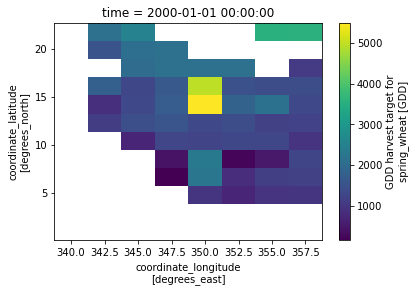

In [113]:
# Zoom in on N. African savannas/dry forests
nafr_gdds = rx_gdds.sel(lon=slice(340,360), lat=slice(0,22))
nafr_gdds.plot();

In [114]:
# Pick a gridcell
# print(f'lon: {nafr_gdds.lon.values}')
# print(f'lat: {nafr_gdds.lat.values}')
thisLon_nafr = 355
thisLat_nafr = 8.526316
print(f'Bad (?) GDD value for lon {thisLon_nafr} lat {thisLat_nafr}: {nafr_gdds.sel(lon=thisLon_nafr, lat=thisLat_nafr).values[0]}')
print(f'Sowing date for lon {thisLon_nafr} lat {thisLat_nafr}: {rx_sdates.sel(lon=thisLon_nafr, lat=thisLat_nafr).values[0]}')
print(f'Harvest date for lon {thisLon_nafr} lat {thisLat_nafr}: {rx_hdates.sel(lon=thisLon_nafr, lat=thisLat_nafr).values[0]}')

Bad (?) GDD value for lon 355 lat 8.526316: 494.3042819115423
Sowing date for lon 355 lat 8.526316: 191.0
Harvest date for lon 355 lat 8.526316: 327.0


What are the extents of these gridcells?

In [115]:
def get_edges(coord_da, thisCoord):
    i = np.where(coord_da == thisCoord)[0][0]
    def get_edge(j):
        return thisCoord + j*np.abs(thisCoord - coord_da.values[i+j])/2
    return [get_edge(-1), get_edge(1)]

print('GRIDCELL EXTENTS')

print('Indian gridcell:')
edges_lon_india = get_edges(india_gdds.lon, thisLon_india)
edges_lat_india = get_edges(india_gdds.lat, thisLat_india)
print(f'   lon: {edges_lon_india}')
print(f'   lat: {edges_lat_india}')

print('African gridcell:')
edges_lon_nafr = get_edges(nafr_gdds.lon, thisLon_nafr)
edges_lat_nafr = get_edges(nafr_gdds.lat, thisLat_nafr)
print(f'   lon: {edges_lon_nafr}')
print(f'   lat: {edges_lat_nafr}')

GRIDCELL EXTENTS
Indian gridcell:
   lon: [76.25, 78.75]
   lat: [18.9473685, 20.842105743652343]
African gridcell:
   lon: [353.75, 356.25]
   lat: [7.578947461135864, 9.47368446636963]
